In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import time
import seaborn as sns
sns.set()

In [3]:
def flipcoin():
    flip = random.randint(1,100)

    if flip >= 51:
        return False
    else:
        return True

In [4]:
fund = 15000
wagercount = 100
df = pd.DataFrame(columns=(['Values','Change']), index = range(wagercount+1))
df.loc[0][0] = fund

In [5]:
def doubler_betting(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1

    # since we'll be betting based on previous bet outcome #
    previousWager = 'win'

    # since we'll be doubling #
    previousWagerAmount = initial_wager

    while currentWager <= wager_count and value > 5000:
        if previousWager == 'win':
            #print('Won')
            if flipcoin():
                value += wager
                #print (value)
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager  
                previousWager = 'loss'
                #print(value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
        elif previousWager == 'loss':
            #print ('lost, double up')
            if flipcoin():
                wager = previousWagerAmount * 2
                #print ('we won'),wager
                value += wager
                #print (value)
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                #print ('lost'),wager
                value -= wager
                #print (value)
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

        x = currentWager
        y = x-1
        df.loc[x][0] = value
        df.loc[x][1] = (df.iloc[x][0]-df.iloc[y][0])/df.iloc[y][0]
        currentWager += 1
        plt.plot(wX,vY)
    
    if value <= 5000:
            print (f"one more broke after {currentWager} bets")
            df.iloc[-1][0] = value

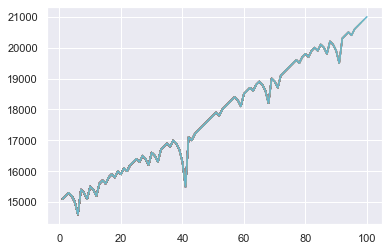

In [8]:
doubler_betting(fund,100,wagercount)
plt.show()

In [7]:
sd = np.std(df["Change"])
excessreturn = np.mean(df["Change"])
sharpe_ratio = excessreturn/sd
print(f"sd = {round(sd,6)}")
print(f"rate of return = {round(excessreturn,4)}")
print(f"sharpe ratio = {round(sharpe_ratio,4)}")

sd = 0.031303
rate of return = 0.003
sharpe ratio = 0.0954


one more broke after 87 bets
one more broke after 18 bets
one more broke after 54 bets
one more broke after 23 bets
one more broke after 13 bets
one more broke after 39 bets
one more broke after 19 bets


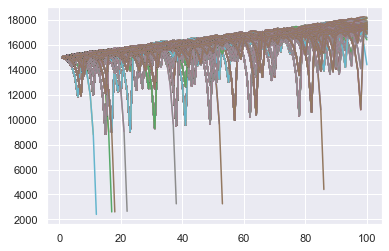

In [14]:
tdf = pd.DataFrame(columns=(['RateReturn','Return']), index = range(100))
for i in range(100):
    doubler_betting(fund,50,wagercount)
    tdf.loc[i] = (df.copy().iloc[-1][0]-df.copy().loc[0][0])/df.copy().loc[0][0]

In [18]:
sd = np.std(tdf['RateReturn'])
excessreturn = np.mean(tdf['RateReturn'])
sharpe_ratio = excessreturn/sd
print(f"sd = {round(sd,6)}")
print(f"rate of return = {round(excessreturn,4)}")
print(f"sharpe ratio = {round(sharpe_ratio,4)}")

sd = 0.246632
rate of return = 0.0929
sharpe ratio = 0.3765


In [15]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
tdf['Return'] = tdf.copy()['RateReturn']*15000
Liability = 0
for i in range(100):
        if tdf['Return'][i] <= 0:
            Liability -= tdf['Return'][i]
print(f"Sum of Return = {round(tdf['Return'].sum(),6)}")
print(f"Liability = {round(Liability,6)}")
tdf

Sum of Return = 139300.0
Liability = 84450.0


,RateReturn,Return
0,0.173333,2600.0
1,0.166667,2500.0
2,0.176667,2650.0
3,0.106667,1600.0
4,-0.04,-600.0
5,0.163333,2450.0
6,0.163333,2450.0
7,0.17,2550.0
8,0.186667,2800.0
9,0.13,1950.0
